In [4]:
from google.colab import files
import pandas as pd

# Upload CSV
uploaded = files.upload()

# Load it into a DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Preview data
df.head()


Saving 8. Student Performance Prediction.csv to 8. Student Performance Prediction.csv


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


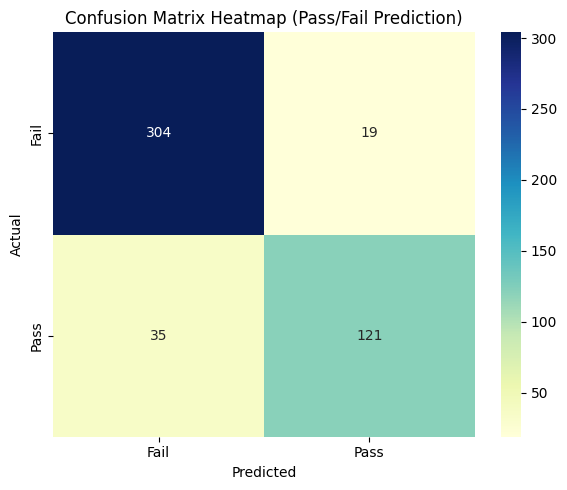

Accuracy: 0.8873
Precision (Pass): 0.8643
Recall (Pass): 0.7756


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the dataset
df = pd.read_csv("8. Student Performance Prediction.csv")  # Ensure this file is in the same folder

# Create binary 'PassFail' target: 1 = Pass (GradeClass <= 2), 0 = Fail
df["PassFail"] = df["GradeClass"].apply(lambda x: 1 if x <= 2 else 0)

# Drop unnecessary columns
df_model = df.drop(columns=["StudentID", "GPA", "GradeClass"])

# Features and target
X = df_model.drop("PassFail", axis=1)
y = df_model["PassFail"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)

# Show heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu",
            xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.title("Confusion Matrix Heatmap (Pass/Fail Prediction)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Pass): {precision:.4f}")
print(f"Recall (Pass): {recall:.4f}")
